In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Consumer_Dataset.csv')

In [3]:
for age in df['Age'].unique():
    # Find the mode of Total_Family_Members for the current age
    mode_value = df[df['Age'] == age]['Family_Size'].mode()
    if not mode_value.empty:
        mode_value = mode_value[0]
        # Fill NaN values with the mode for the current age
        df.loc[(df['Age'] == age) & (df['Family_Size'].isnull()), 'Family_Size'] = mode_value


In [4]:
for age in df['Age'].unique():
    for profession in df['Profession'].unique():
        for gender in df['Gender'].unique():
        # Find the mean of Work_Experience for the current age and profession
            mean_value = df[(df['Age'] == age) & (df['Profession'] == profession)&(df['Gender'] == gender)]['Work_Experience'].mean()
        # Fill NaN values with the mean for the current age and profession
            df.loc[(df['Age'] == age) & (df['Gender'] == gender) &(df['Profession'] == profession) & (df['Work_Experience'].isnull()), 'Work_Experience'] = mean_value
df.isna().sum()

Unnamed: 0               0
Gender                   0
Age                      0
Ever_Married           140
Family_Size              0
Profession             124
Graduated               78
Work_Experience         45
Energy_Consumption       0
Preferred_Renewable     76
Group                    0
dtype: int64

In [5]:
# for remaining people's work experience
for age in df['Age'].unique():
    for gender in df['Gender'].unique():
    # Find the mode of Total_Family_Members for the current age
        mode_value = df[df['Age'] == age]['Ever_Married'].mode()
    if not mode_value.empty:
        mode_value = mode_value[0]
        # Fill NaN values with the mode for the current age
        df.loc[(df['Age'] == age) & (df['Gender'] == gender) &(df['Ever_Married'].isnull()), 'Ever_Married'] = mode_value

In [6]:
df = df.dropna()

If we consider we have no limit on classification

In [7]:

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Ever_Married'] = encoder.fit_transform(df['Ever_Married'])
df['Profession'] = encoder.fit_transform(df['Profession'])
df['Graduated'] = encoder.fit_transform(df['Graduated'])
df['Energy_Consumption'] = encoder.fit_transform(df['Energy_Consumption'])
df['Preferred_Renewable'] = encoder.fit_transform(df['Preferred_Renewable'])
df['Group'] = encoder.fit_transform(df['Group'])
X = df[['Gender', 'Age', 'Ever_Married', 'Family_Size',
       'Profession', 'Graduated', 'Work_Experience', 'Energy_Consumption',
       'Preferred_Renewable']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

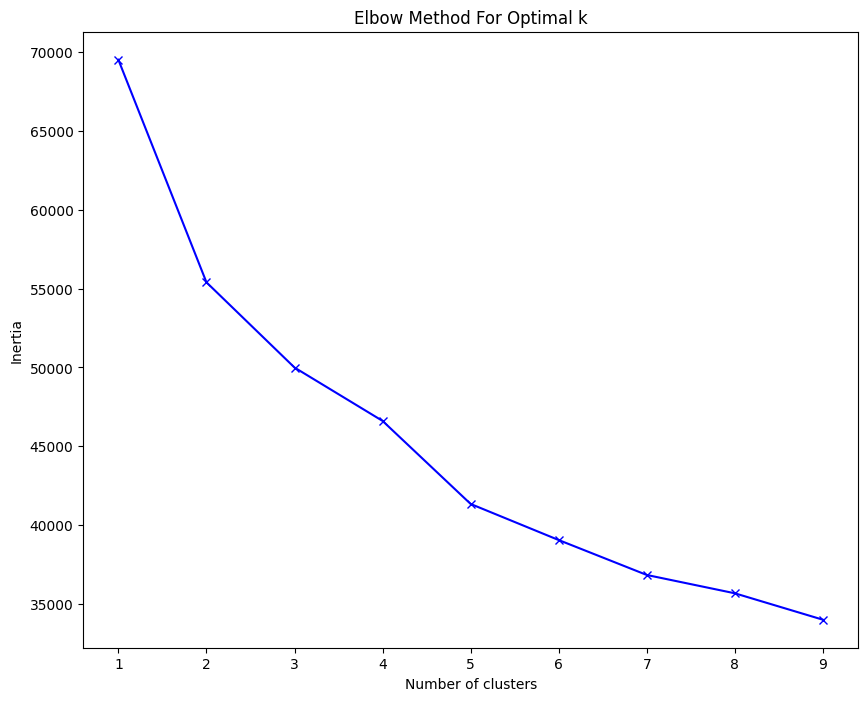

In [8]:

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


here as it can be seen that there is an elbow point at k =4

**Assuming we want to group in 4**

In [9]:
# new_data = pd.read_csv('Consumer_Dataset.csv')

# new_data['Gender'] = df['Gender']
# new_data['Ever_Married']=df['Ever_Married']
# new_data['Family_Size']=df['Family_Size']
# new_data['Profession']=df['Profession']
# new_data['Graduated']=df['Graduated']
# new_data['Work_Experience']=df['Work_Experience']
# new_data['Energy_Consumption']=df['Energy_Consumption']
# new_data['Preferred_Renewable']=df['Preferred_Renewable']
# # new_data['Group']=df1['Group']

# # new_data['Group'] =  encoder.fit_transform(df['new_data'])

# new_data_scaled = scaler.transform(new_data)

# # Predict the cluster for new data
# new_data['Group'] = kmeans.predict(new_data_scaled)
# print(new_data)
# df.columns

In [10]:
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(n_components=4, random_state=42)

# # Fit GMM to the data
# gmm.fit(X)

# # Predict the cluster labels
# labels = gmm.predict(X)
# y_pred = labels

In [11]:
# from sklearn.cluster import AgglomerativeClustering
# agg_cluster = AgglomerativeClustering(n_clusters=4)
# y_pred = agg_cluster.fit_predict(X)
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import FeatureAgglomeration,MiniBatchKMeans,MeanShift,SpectralClustering
y_true = df['Group']
cluster = DBSCAN(eps=4, min_samples=2)
y_pred = cluster.fit_predict(X_scaled)
print('db: ',accuracy_score(y_pred,y_true))

# cluster = AffinityPropogation()
# y_pred = cluster.fit_predict(X_scaled)
# print('ap: ',accuracy_score(y_pred,y_true))

# cluster = FeatureAgglomeration()
# y_pred = cluster.fit_predict(X_scaled)
# print('fa: ',accuracy_score(y_pred,y_true))

cluster = MiniBatchKMeans()
y_pred = cluster.fit_predict(X_scaled)
print('mb: ',accuracy_score(y_pred,y_true))

cluster = MeanShift()
y_pred = cluster.fit_predict(X_scaled)
print('mn: ',accuracy_score(y_pred,y_true))

cluster = SpectralClustering(n_clusters=4)
y_pred = cluster.fit_predict(X_scaled)
print('sc: ',accuracy_score(y_pred,y_true))





db:  0.24278130260261557
mb:  0.16573870257671888
mn:  0.24278130260261557
sc:  0.18542017350770426


In [12]:
from sklearn.cluster import OPTICS
cluster = OPTICS()
y_pred = cluster.fit_predict(X_scaled)
print('op: ',accuracy_score(y_pred,y_true))

op:  0.0016832836980448013


C:\Users\sarva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [13]:
from sklearn.cluster import HDBSCAN,Birch
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
cluster = HDBSCAN(min_cluster_size=4)
y_pred = cluster.fit_predict(X_scaled)
print('hbd: ',accuracy_score(y_pred,y_true))

cluster = Birch(n_clusters=3)
y_pred = cluster.fit_predict(X_scaled)
print('birch: ',accuracy_score(y_pred,y_true))

cluster = GaussianMixture()
y_pred = cluster.fit_predict(X_scaled)
print('gm: ',accuracy_score(y_pred,y_true))

cluster = BayesianGaussianMixture()
y_pred = cluster.fit_predict(X_scaled)
print('bgm: ',accuracy_score(y_pred,y_true))


hbd:  0.0011653502524925548
birch:  0.26220380681082484
gm:  0.24278130260261557
bgm:  0.24278130260261557


In [14]:
cluster = DBSCAN(eps=55, min_samples=7000)
y_pred = cluster.fit_predict(X_scaled)
print('dbs: ',accuracy_score(y_pred,y_true))

dbs:  0.24278130260261557


In [17]:
df

,Unnamed: 0,Gender,Age,Ever_Married,Family_Size,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable,Group
0,0,1,22,0,4.0,5,0,1.000000,2,2,3
1,1,0,38,1,3.0,2,1,3.041667,0,2,0
2,2,0,67,1,1.0,2,1,1.000000,2,4,1
3,3,1,67,1,2.0,7,1,0.000000,1,4,1
4,4,0,40,1,6.0,3,1,5.777778,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
8062,8062,1,41,1,5.0,0,1,0.000000,1,4,1
8064,8064,1,35,0,4.0,4,0,3.000000,2,2,3
8065,8065,0,33,0,1.0,5,1,1.000000,2,4,3
8066,8066,0,27,0,4.0,5,1,1.000000,2,4,1


In [26]:
y_db = y_pred
y_pred = df['Cluster'] 
y_true = df['Group']
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix

Adjusted Rand Index (ARI): 0.0
Normalized Mutual Information (NMI): 0.0


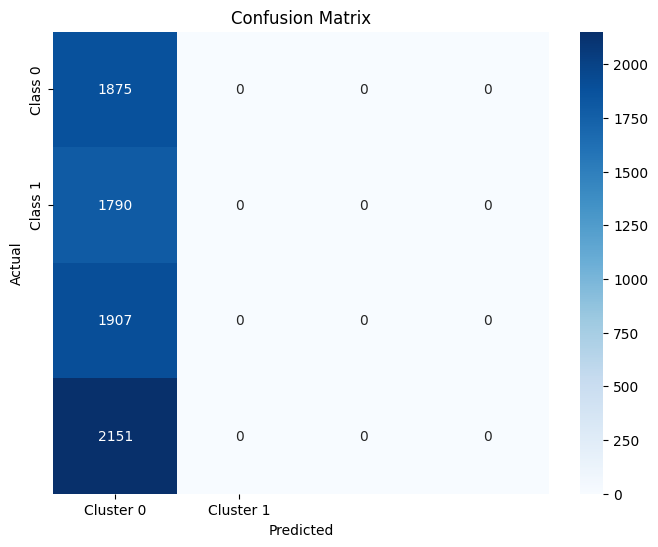

In [27]:
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)


print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_true))
print(accuracy_score(y_db,y_true))

0.24278130260261557
0.24278130260261557
